In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Boston House Pricing Data

In [2]:
from sklearn.datasets import fetch_california_housing
boston= fetch_california_housing()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
## Lets check the description of the dataset
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(boston.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(boston.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print(boston.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the data set

In [8]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [9]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
dataset.head(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25


In [11]:
dataset['Price']=boston.target

In [12]:
dataset.head(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Sumerising the state of data

In [14]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
## Checking the missing value
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [16]:
### Exploratort Data Analysis
### Corelation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
import seaborn as sns

In [18]:
#sns.pairplot(dataset)
#plt.show()

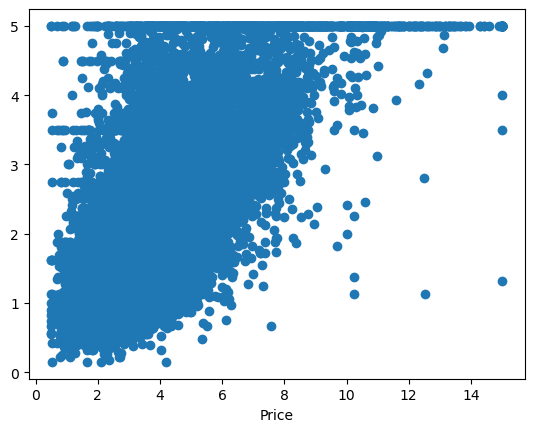

In [19]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel('MedInc')
plt.xlabel('Price')
plt.show()

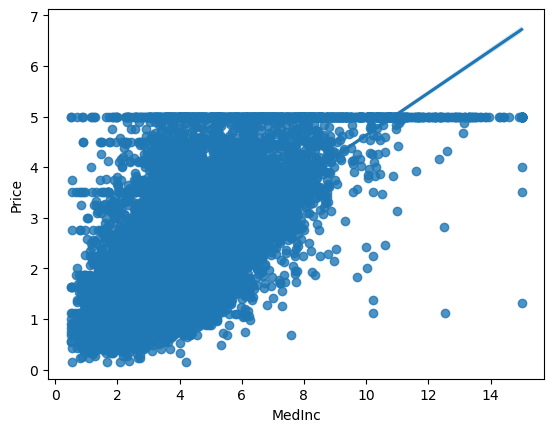

In [20]:
sns.regplot(x='MedInc' , y='Price',data=dataset)
plt.show()

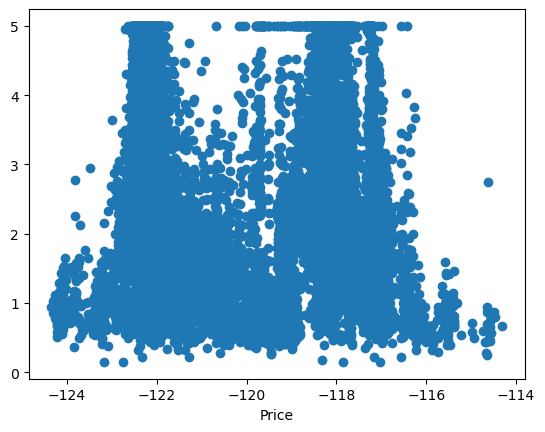

In [21]:
plt.scatter(dataset['Longitude'],dataset['Price'])
plt.xlabel('Longitude')
plt.xlabel('Price')
plt.show()

In [22]:
## creating and adding new data Rooms per Household
dataset2=dataset
dataset2['RPH']=dataset2['AveRooms']/ dataset2['AveOccup']

In [23]:
dataset2.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,RPH
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075,0.237828
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623,-0.107926
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948,0.887282
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701,0.824678
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,-0.140520
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737,-0.053906
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160,0.140345
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967,-0.074420
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000,0.209482
RPH,0.237828,-0.107926,0.887282,0.824678,-0.140520,-0.053906,0.140345,-0.074420,0.209482,1.000000


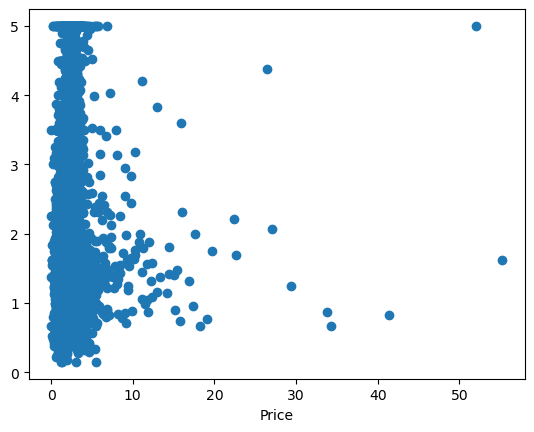

In [24]:
plt.scatter(dataset2['RPH'],dataset2['Price'])
plt.xlabel('RPH')
plt.xlabel('Price')
plt.show()

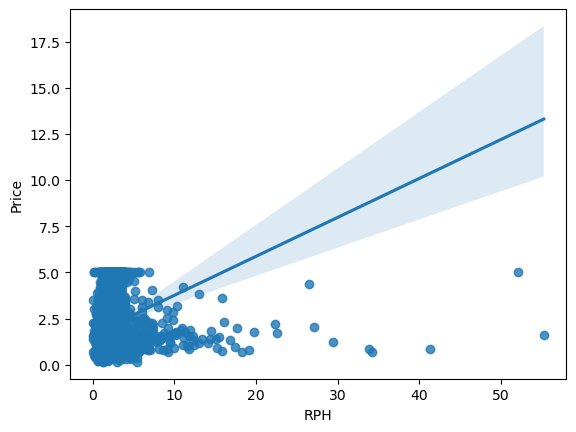

In [25]:
sns.regplot(x='RPH' , y='Price',data=dataset2)
plt.show()

# Attemp 1 For Creating Model

In [26]:
new_dataset1=dataset.drop(columns=['AveBedrms','Population','AveOccup','Latitude','Longitude'])

In [27]:
new_dataset1.corr()

,MedInc,HouseAge,AveRooms,Price,RPH
MedInc,1.000000,-0.119034,0.326895,0.688075,0.237828
HouseAge,-0.119034,1.000000,-0.153277,0.105623,-0.107926
AveRooms,0.326895,-0.153277,1.000000,0.151948,0.887282
Price,0.688075,0.105623,0.151948,1.000000,0.209482
RPH,0.237828,-0.107926,0.887282,0.209482,1.000000


### Train Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
X1 = new_dataset1.drop(columns=['Price'])
y1=new_dataset1['Price']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [30]:
model1 = LinearRegression()
model1.fit(X_train1,y_train1)

LinearRegression()

In [31]:
y_pred1 = model1.predict(X_test1)

In [32]:
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test1, y_pred1)

# Print the results
print(f"Mean Absolute Error (MAE): {mae1:.4f}")
print(f"Mean Squared Error (MSE): {mse1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse1:.4f}")
print(f"R² Score: {r21:.4f}")

Mean Absolute Error (MAE): 0.5558
Mean Squared Error (MSE): 0.5718
Root Mean Squared Error (RMSE): 0.7562
R² Score: 0.5637


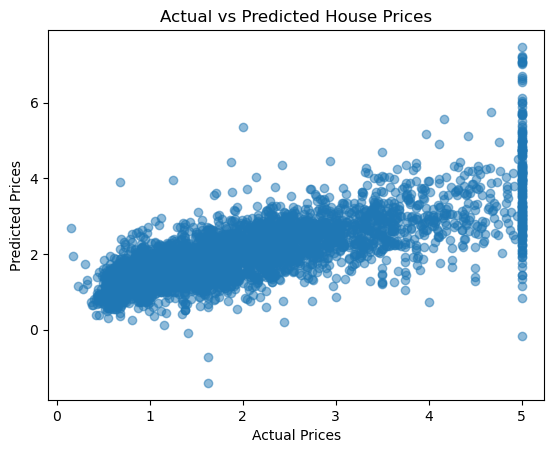

In [33]:
plt.scatter(y_test1, y_pred1,  alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [34]:
model1.score(X_test1,y_test1)

0.5636610198498127

# Attemp 2 For Creating Model

In [35]:
## Independent and Dependent features
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,RPH
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,1.970414
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,1.957865
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.238332
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.510121


In [36]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,RPH
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075,0.237828
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623,-0.107926
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948,0.887282
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701,0.824678
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650,-0.140520
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737,-0.053906
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160,0.140345
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967,-0.074420
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000,0.209482
RPH,0.237828,-0.107926,0.887282,0.824678,-0.140520,-0.053906,0.140345,-0.074420,0.209482,1.000000


In [37]:
X2=dataset.drop(columns=['Price','AveBedrms','Population','Longitude','AveOccup'])
y2=dataset['Price']
X_train2, X_test2 , y_train2 , y_test2 = train_test_split(X2,y2, test_size=.2,random_state=42)

In [38]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
X_train2=scaler.fit_transform(X_train2)

In [40]:
X_test2=scaler.transform(X_test2)

In [41]:
y_test2

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Price, Length: 4128, dtype: float64

In [42]:
X_test2

array([[-1.15508475, -0.28632369, -0.52068576,  0.1951    , -0.79891411],
       [-0.70865905,  0.11043502, -0.16581537, -0.23549054, -0.08889031],
       [-0.21040155,  1.85617335, -0.61076476,  1.00947776,  0.8377115 ],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156,  0.78014149,  0.54460603],
       [-0.57542978,  0.58654547, -0.06124296,  0.52740357,  0.05561671],
       [-0.17259111, -0.92113763, -0.6058703 , -0.66608108, -0.80935897]])

In [43]:
model2=LinearRegression()

In [44]:
model2.fit(X_train2,y_train2)

LinearRegression()

In [45]:
y_pred2 = model2.predict(X_test2)

In [46]:
model2.score(X_test2,y_test2)

0.5759703230428062

In [47]:
model2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [48]:
y_pred2

array([0.82664495, 1.5507956 , 2.96463986, ..., 4.24134283, 1.69429533,
       1.69552039])

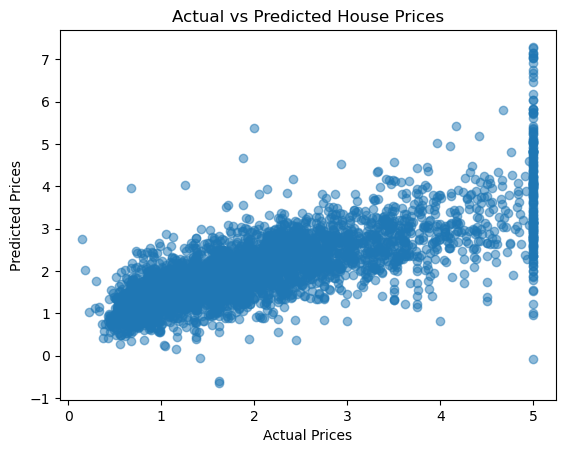

In [49]:
plt.scatter(y_test2, y_pred2,  alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [50]:
#Residual
residuals=y_test2-y_pred2
residuals

20046   -0.349645
3024    -1.092796
15663    2.035370
20484   -0.353286
9814     0.643940
           ...   
15362    0.490127
16623    0.954365
18086    0.758667
2144    -0.971295
3665    -0.180520
Name: Price, Length: 4128, dtype: float64

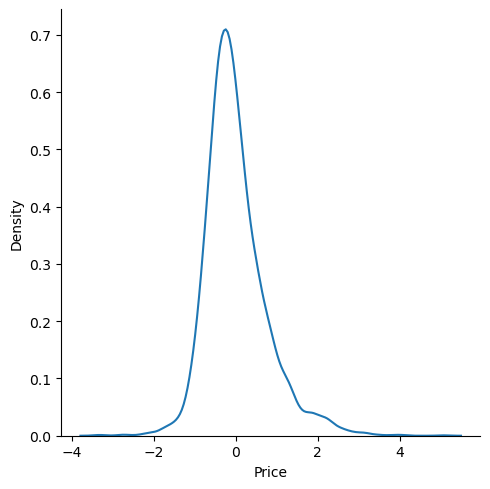

In [51]:
sns.displot(residuals,kind='kde')
plt.show()

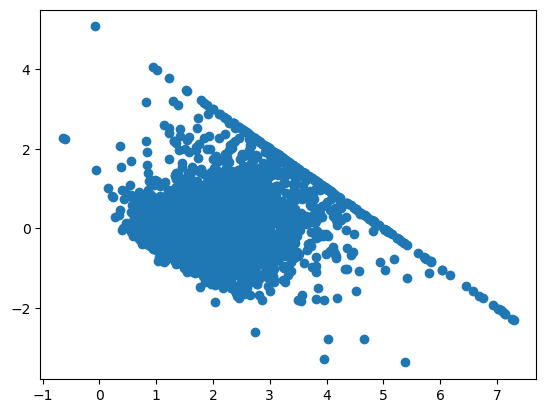

In [52]:
##Scatted plot withrespect to predction and residuals
plt.scatter(y_pred2,residuals)
plt.show()

In [53]:
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test2, y_pred2)

# Print the results
print(f"Mean Absolute Error (MAE): {mae2:.4f}")
print(f"Mean Squared Error (MSE): {mse2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
print(f"R² Score: {r22:.4f}")

Mean Absolute Error (MAE): 0.5487
Mean Squared Error (MSE): 0.5557
Root Mean Squared Error (RMSE): 0.7454
R² Score: 0.5760


## R Square and adjusted R square
Formula 
R^2=1-SSR/SST
R^2 = coeff of determination SSR=sum of squares of residuals SST=total sum of squares

In [54]:
from sklearn.metrics import r2_score
score=r2_score(y_test2, y_pred2)
score

0.5759703230428062

## Adjusted R square
R2=1-[(1-R2)*(n-1)/(n-k-1)]

In [55]:
1-(1-score)*(len(y_test2)-1)/(len(y_test2)-X_test2.shape[1]-1)

0.5754559736044786

## New Data Predction

In [56]:
X2_array = X2.to_numpy()
X2_array

array([[ 8.3252    , 41.        ,  6.98412698, 37.88      ,  2.73291925],
       [ 8.3014    , 21.        ,  6.23813708, 37.86      ,  2.95668471],
       [ 7.2574    , 52.        ,  8.28813559, 37.85      ,  2.95766129],
       ...,
       [ 1.7       , 17.        ,  5.20554273, 39.43      ,  2.23833168],
       [ 1.8672    , 18.        ,  5.32951289, 39.43      ,  2.51012146],
       [ 2.3886    , 16.        ,  5.25471698, 39.37      ,  2.00793079]])

In [57]:
X2_array = X2.to_numpy()
sample = X2_array[0].reshape(1, -1)

In [58]:
scaled_sample = scaler.transform(sample)  

D:\Software Installed\Anoconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
prediction = model2.predict(scaled_sample)
print(prediction)

[4.1829846]


In [60]:
y_test2

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Price, Length: 4128, dtype: float64

## Pickling the model file for Deployment

In [61]:
import pickle

In [62]:
pickle.dump(model2,open('regmodel.pkl','wb'))

In [63]:
pickle_model=pickle.load(open('regmodel.pkl','rb'))

In [64]:
pickle_model.predict(scaled_sample)

array([4.1829846])